1. PROBLEM STATEMENT:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

2.HYPOTHESIS FORMATION:
 - SUPER MARKET OF ANY TYPE WILL HAVE MORE SALES THAN GROCERY STORE
 - OUTLET SIZE WILL INFLUENCE SALES AS HIGH OUTLET SIZE WILL CONTRIBUTE TO MORE SALES
 - ITEM TYPE:  FRUITS AND VEGETABLES, MEAT WILL HAVE HIGHER SALES
 - OUTLET LOCATION TYPE WILL INFLUENCE SALES AS : TIER 1 WILL HAVE HIGHER SALES THAN TIER THREE DUE TO ACCESSIBILITY REASONS


In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!{sys.executable} -m pip install xgboost

In [11]:
# importing the data
df= pd.read_excel("testdata.xlsx")
dfa=pd.read_excel("traindata.xlsx")

In [147]:
dfa.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [148]:
print(df.dtypes) # determing data types  

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


## EXPLORATORY DATA ANALYSIS

DATA CLEANING: removing unwanted columns and duplicate values

In [12]:
dfd=df.drop_duplicates
dfd1=dfa.drop_duplicates
print(dfd)

<bound method DataFrame.drop_duplicates of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092        

In [13]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)                                     ## there are no duplicate records now


0


since item identifier and outlet identifiers are the columns which are of no significance while predicting sales hence dropping them 

In [14]:
df_drop = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
dfa_drop= dfa.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
df2=df_drop
dfaa=dfa_drop
df2


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [152]:
df2.shape   # TRAIN DATASET

(8523, 10)

In [153]:
dfaa.shape  # TEST DATASET

(5681, 9)

DATA TRANSFORMATION

In [154]:
dft = pd.pivot_table(df2, index=['Outlet_Location_Type'], columns=["Outlet_Type"], values='Item_Outlet_Sales')
dft

# mean of sales w.r.t to combination of outlet_type and Outlet_Location_Type 

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,340.329723,2313.099451,NaN,NaN
Tier 2,NaN,2323.990559,NaN,NaN
Tier 3,339.351662,2298.995256,1995.498739,3694.038558


In [52]:
fil_df=df2.loc[(df["Outlet_Type"]=="Grocery Store")&(df["Outlet_Location_Type"]=="Tier 2")]
print(fil_df)

Empty DataFrame
Columns: [Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, missing_column1, missing_column2, ItemW]
Index: []


##### THERE ARE NO TIER TWO CITIES HAVING STORE TYPE - GROCERY

In [156]:
dft1 = pd.pivot_table(df2, index=['Outlet_Size'], columns=["Outlet_Type"], values='Item_Outlet_Sales')
dft1

## mean of sales wrt to combination of outlet_Size and Outlet_Type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,NaN,2298.995256,NaN,NaN
Medium,NaN,2348.354635,1995.498739,3694.038558
Small,340.329723,2358.343066,NaN,NaN


In [157]:
dft2= pd.pivot_table(df2, index=['Item_Type'], values='Item_Outlet_Sales')
dft2

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


In [158]:
df4=dft2.reset_index()
df4

,Item_Type,Item_Outlet_Sales
0,Baking Goods,1952.971207
1,Breads,2204.132226
2,Breakfast,2111.808651
3,Canned,2225.194904
4,Dairy,2232.542597
5,Frozen Foods,2132.867744
6,Fruits and Vegetables,2289.009592
7,Hard Drinks,2139.221622
8,Health and Hygiene,2010.000265
9,Household,2258.784300


In [159]:
sortdf=df4.sort_values("Item_Outlet_Sales")
sortdf

,Item_Type,Item_Outlet_Sales
11,Others,1926.139702
0,Baking Goods,1952.971207
14,Soft Drinks,2006.511735
8,Health and Hygiene,2010.000265
2,Breakfast,2111.808651
5,Frozen Foods,2132.867744
7,Hard Drinks,2139.221622
10,Meat,2158.977911
1,Breads,2204.132226
3,Canned,2225.194904


##### so it is very evident that starchy foods have the maximum sales whereas baking goods have least

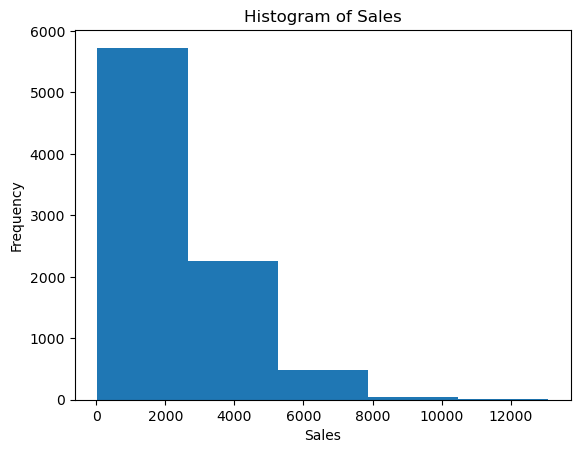

In [160]:
plt.hist(df['Item_Outlet_Sales'], bins=5)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')

# Display the histogram 
plt.show()



## we can see that the distribution of sales is certainly not normal and it is left skewed data


### HANDLING MISSING VALUES

In [161]:
print(df2.isnull().sum())                        # Item_Weight   and  Outlet_Size   are the columns having missing values

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [162]:
print(dfaa.isnull().sum())   

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [15]:
df2['missing_column1'] = np.where(df2['Outlet_Size'].isnull(), 1, 0)
df2['missing_column2'] = np.where(df2['Item_Weight'].isnull(), 1, 0)
dfaa['missing_column1'] = np.where(dfaa['Outlet_Size'].isnull(), 1, 0)
dfaa['missing_column2'] = np.where(dfaa['Item_Weight'].isnull(), 1, 0)


In [164]:
#Visual inspection: Bar plot of missingness by variable_of_interest
sns.countplot(x='Item_Outlet_Sales', hue='missing_column1', data=df2)
plt.title('Missingness by Variable of Interest')
plt.show()





KeyboardInterrupt: 

##### since by visual inspection it is visible that missisng values are randomly generated therefore we can use mode imputation 

In [ ]:
#Visual inspection: Bar plot of missingness by variable_of_interest
sns.countplot(x='Item_Outlet_Sales', hue='missing_column2', data=df2)
plt.title('Missingness by Variable of Interest')
plt.show()

In [ ]:
missing_matrix = df2.isnull().astype(int)
sns.heatmap(missing_matrix, cmap='Reds', cbar=False)


<AxesSubplot:>

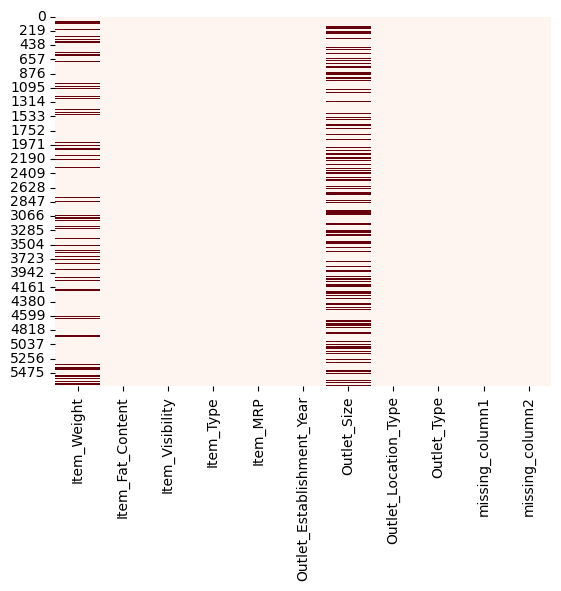

In [97]:
missing_matrix = dfaa.isnull().astype(int)
sns.heatmap(missing_matrix, cmap='Reds', cbar=False)

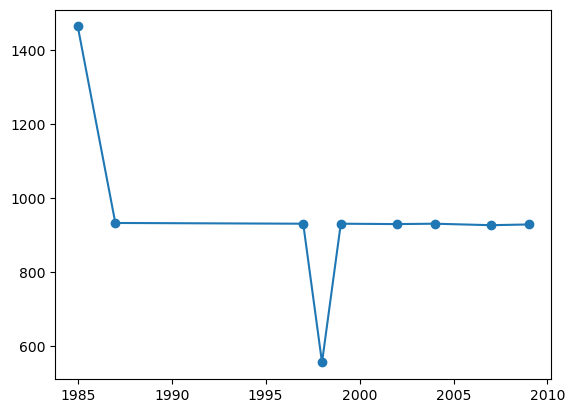

In [40]:
df3= df.sort_values('Outlet_Establishment_Year')

# Count the number of missing values for each time point
missing_counts = df3['Outlet_Establishment_Year'].value_counts().sort_index()

# Create a line chart
plt.plot(missing_counts.index, missing_counts.values, marker='o')


#### there is no trend or relation of missing values over time

### hence using mode imputation to fill missing values for categorical variable-outlet_size

In [16]:
df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0], inplace=True) 
dfaa['Outlet_Size'].fillna(dfaa['Outlet_Size'].mode()[0], inplace=True) 

### now handling missing values for Numerical variable- item_weight using multiple imputation method

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Convert the DataFrame column to a DataFrame
data_df = pd.DataFrame({'Item_Weight': df2["Item_Weight"]})

# Create an instance of the IterativeImputer
imputer = IterativeImputer()

# Perform multiple imputation
imputed_data = imputer.fit_transform(data_df)

# Convert the imputed data back to a DataFrame
#imputed_df = pd.DataFrame({'Item_Weight': imputed_data})
df2["ItemW"]= imputed_data

dr=['Item_Weight',"missing_column1","missing_column2"]
df_new = df2.drop(dr, axis=1)
df_new

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ItemW
0,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,19.200
4,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,8.380
8520,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Convert the DataFrame column to a DataFrame
data_df = pd.DataFrame({'Item_Weight': dfaa["Item_Weight"]})

# Create an instance of the IterativeImputer
imputer = IterativeImputer()

# Perform multiple imputation
imputed_data = imputer.fit_transform(data_df)

# Convert the imputed data back to a DataFrame
#imputed_df = pd.DataFrame({'Item_Weight': imputed_data})
dfaa["ItemW"]= imputed_data

dr=['Item_Weight',"missing_column1","missing_column2"]
df_new1 = dfaa.drop(dr, axis=1)
df_new1


,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ItemW
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,20.750000
1,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,8.300000
2,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,14.600000
3,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,7.315000
4,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,12.695633
...,...,...,...,...,...,...,...,...,...
5676,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1,10.500000
5677,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2,7.600000
5678,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1,10.000000
5679,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1,15.300000


In [168]:
print(df_new.isnull().sum())         ## df_new is the new dataframe having no missing values

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
ItemW                        0
dtype: int64


In [169]:
print(df_new1.isnull().sum()) 

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
ItemW                        0
dtype: int64


# #UNIVARIATE ANALYSIS

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

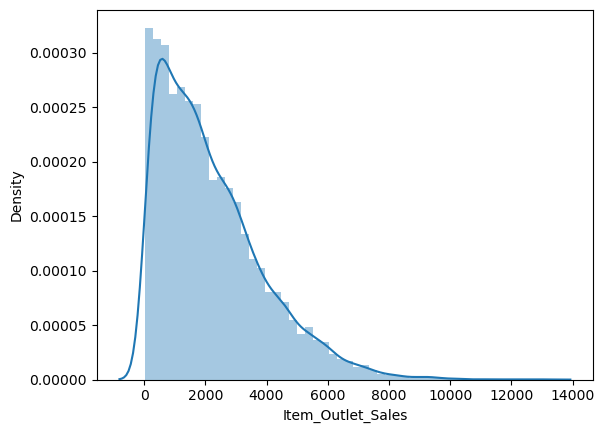

In [47]:
sns.distplot(df["Item_Outlet_Sales"],kde=True)                  


###IT CAN BE OBSERVED HERE THAT THE RESPONSE VARIABLE IS NOT NORMALLY DISTRIBUTED

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


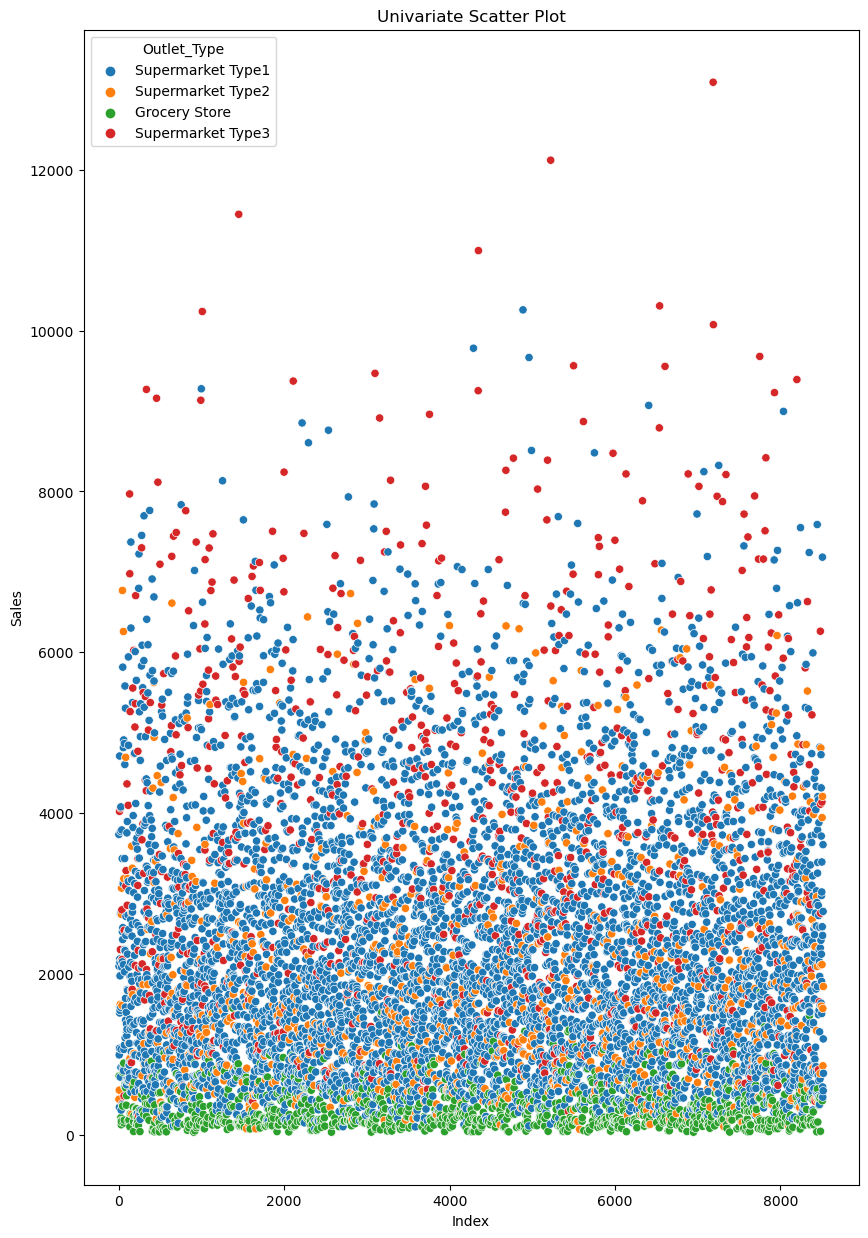

In [45]:
plt.figure(figsize=(10,15))
sns.scatterplot(range(len(df['Item_Outlet_Sales'])), df['Item_Outlet_Sales'],hue=df["Outlet_Type"], marker='o')

# Set labels and title for the plot
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Univariate Scatter Plot')
plt.show()


##IT CAN BE OBSERVED THAT SUPERMARKET TYPE3 HAS THE HIGHEST SALES FOLLOWED BY SUPERMARKET TYPE2 AND TYPE 3 , 
 GROCERY STORES HAVING MINIMUM SALES

<AxesSubplot:>

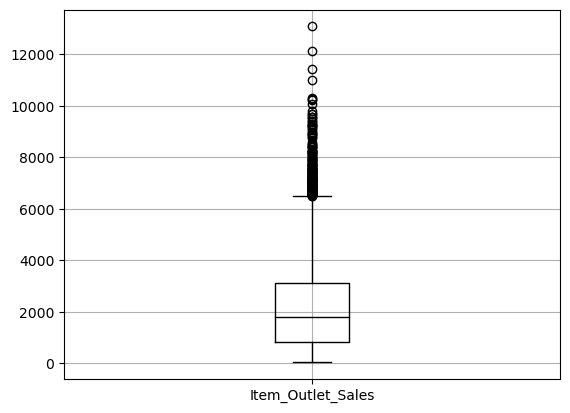

In [115]:
df2.boxplot(column=['Item_Outlet_Sales'], color='black')                

### there are many outliers in the response variable

<AxesSubplot:>

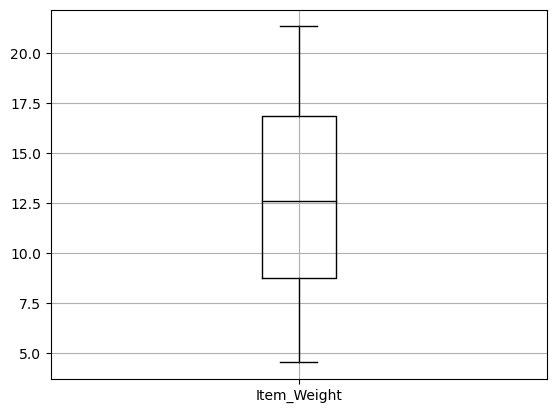

In [116]:
df2.boxplot(column=['Item_Weight'], color='black') 

<AxesSubplot:>

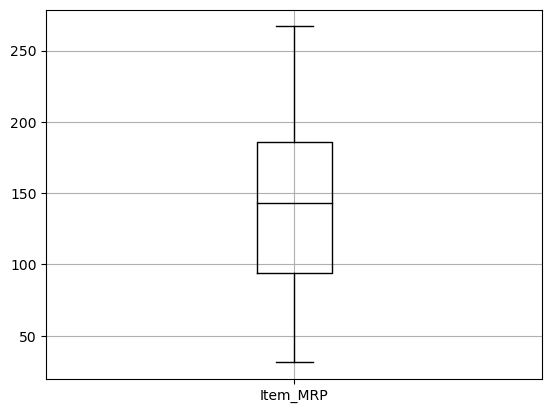

In [110]:
df_new.boxplot(column=['Item_MRP'], color='black')

<AxesSubplot:>

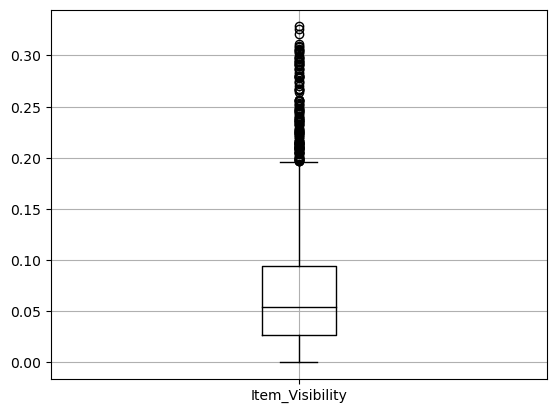

In [117]:
df2.boxplot(column=['Item_Visibility'], color='black')

### Item visibility and outlet sales are the two variables having outliers

### HANDLING OUTLIERS

In [19]:
q1 = np.percentile(df_new['Item_Visibility'], 25)
q3 = np.percentile(df_new['Item_Visibility'], 75)

 # Calculate the interquartile range (IQR)
iqr = q3 - q1

    # Set the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

    # Identify the indices of outliers
outlier_indices = np.where((df_new['Item_Visibility'] < q1 - threshold) | (df_new['Item_Visibility'] > q3 + threshold))

    # Impute outliers with the median
median = np.median(df_new['Item_Visibility'])
df_new['Item_Visibility'].iloc[outlier_indices] = median

C:\Users\ACER\AppData\Local\Temp\ipykernel_9176\3550628987.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Item_Visibility'].iloc[outlier_indices] = median


In [33]:
q1 = np.percentile(df_new['Item_Outlet_Sales'], 25)
q3 = np.percentile(df_new['Item_Outlet_Sales'], 75)

 # Calculate the interquartile range (IQR)
iqr = q3 - q1

    # Set the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

    # Identify the indices of outliers
outlier_indices = np.where((df_new['Item_Outlet_Sales'] < q1 - threshold) | (df_new['Item_Outlet_Sales'] > q3 + threshold))

    # Impute outliers with the median
median = np.median(df_new['Item_Outlet_Sales'])
df_new['Item_Outlet_Sales'].iloc[outlier_indices] = median

C:\Users\ACER\AppData\Local\Temp\ipykernel_9176\3974205677.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Item_Outlet_Sales'].iloc[outlier_indices] = median


<AxesSubplot:>

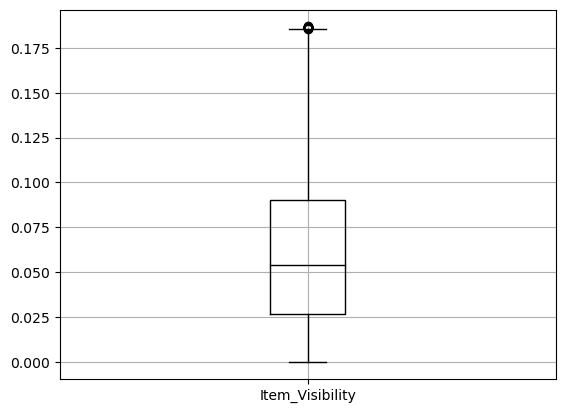

In [121]:
df_new.boxplot(column=['Item_Visibility'], color='black')           ## hence the outliers have been removed

In [34]:
outlier_counts = {}
q1 = np.percentile(df_new['Item_Outlet_Sales'], 25)
q3 = np.percentile(df_new['Item_Outlet_Sales'], 75)

 # Calculate the interquartile range (IQR)
iqr = q3 - q1

    # Set the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

    # Identify the indices of outliers
outlier_indices = np.where((df_new['Item_Outlet_Sales'] < q1 - threshold) | (df_new['Item_Outlet_Sales'] > q3 + threshold))
    # Count the number of outliers
outlier_count = len(outlier_indices[0])
    
    # Store the count in the dictionary
outlier_counts['Item_Outlet_Sales'] = outlier_count

# Print the count of outliers per column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")

Column 'Item_Outlet_Sales': 0 outliers


 hence there are no more outliers now in dataset.

SUMMARY STATISTICS

In [49]:
df2['Item_Outlet_Sales'].mean()

2181.2889135750365

In [50]:
df2['Item_Outlet_Sales'].median()

1794.331

In [51]:
df2['Item_Outlet_Sales'].mode()

0    958.752
Name: Item_Outlet_Sales, dtype: float64

## BIVARIATE ANALYSIS

#Correlation with Heatmap A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in Feature Selection

In [52]:
df_new.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ItemW
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625,-0.012049
Item_MRP,-0.001315,1.000000,0.005020,0.567574,0.024756
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135,-0.008301
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000,0.011550
ItemW,-0.012049,0.024756,-0.008301,0.011550,1.000000


<AxesSubplot:>

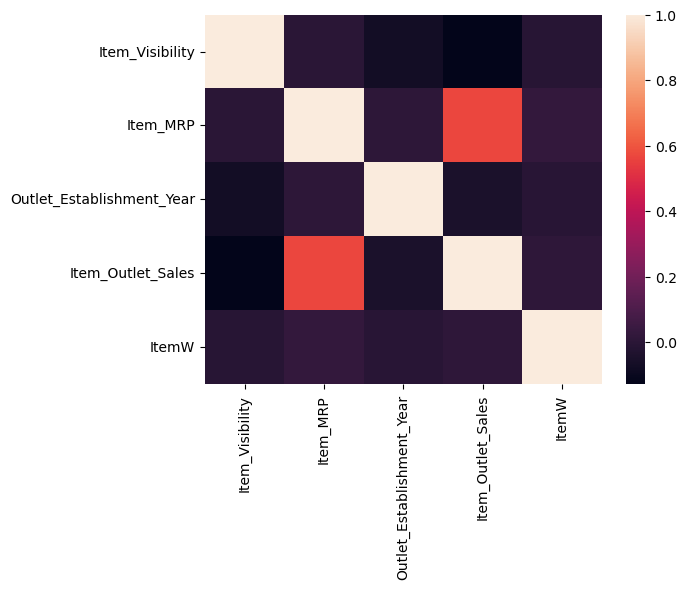

In [53]:
sns.heatmap(df_new.corr())

### it is evident that item_sales and item_MRP are the variables which are highly correlated

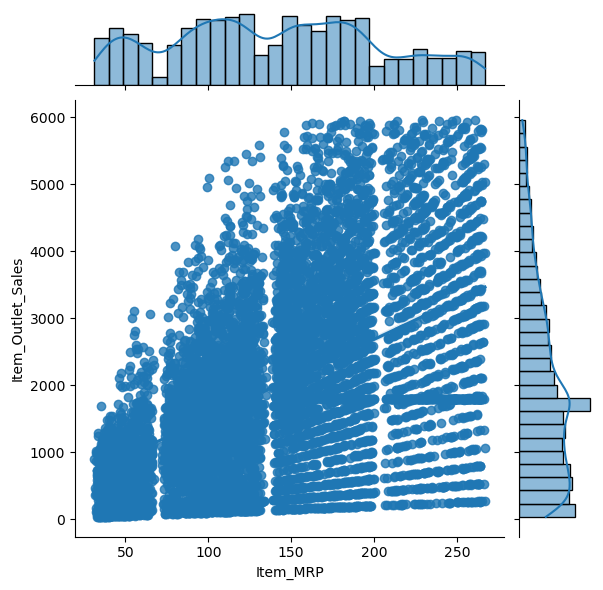

In [54]:
sns.jointplot(y="Item_Outlet_Sales",x="Item_MRP",data=df_new,kind="reg") 

### the above jointplot also shows that the two variables are related, an increase in item_mrp results in an increase in sales

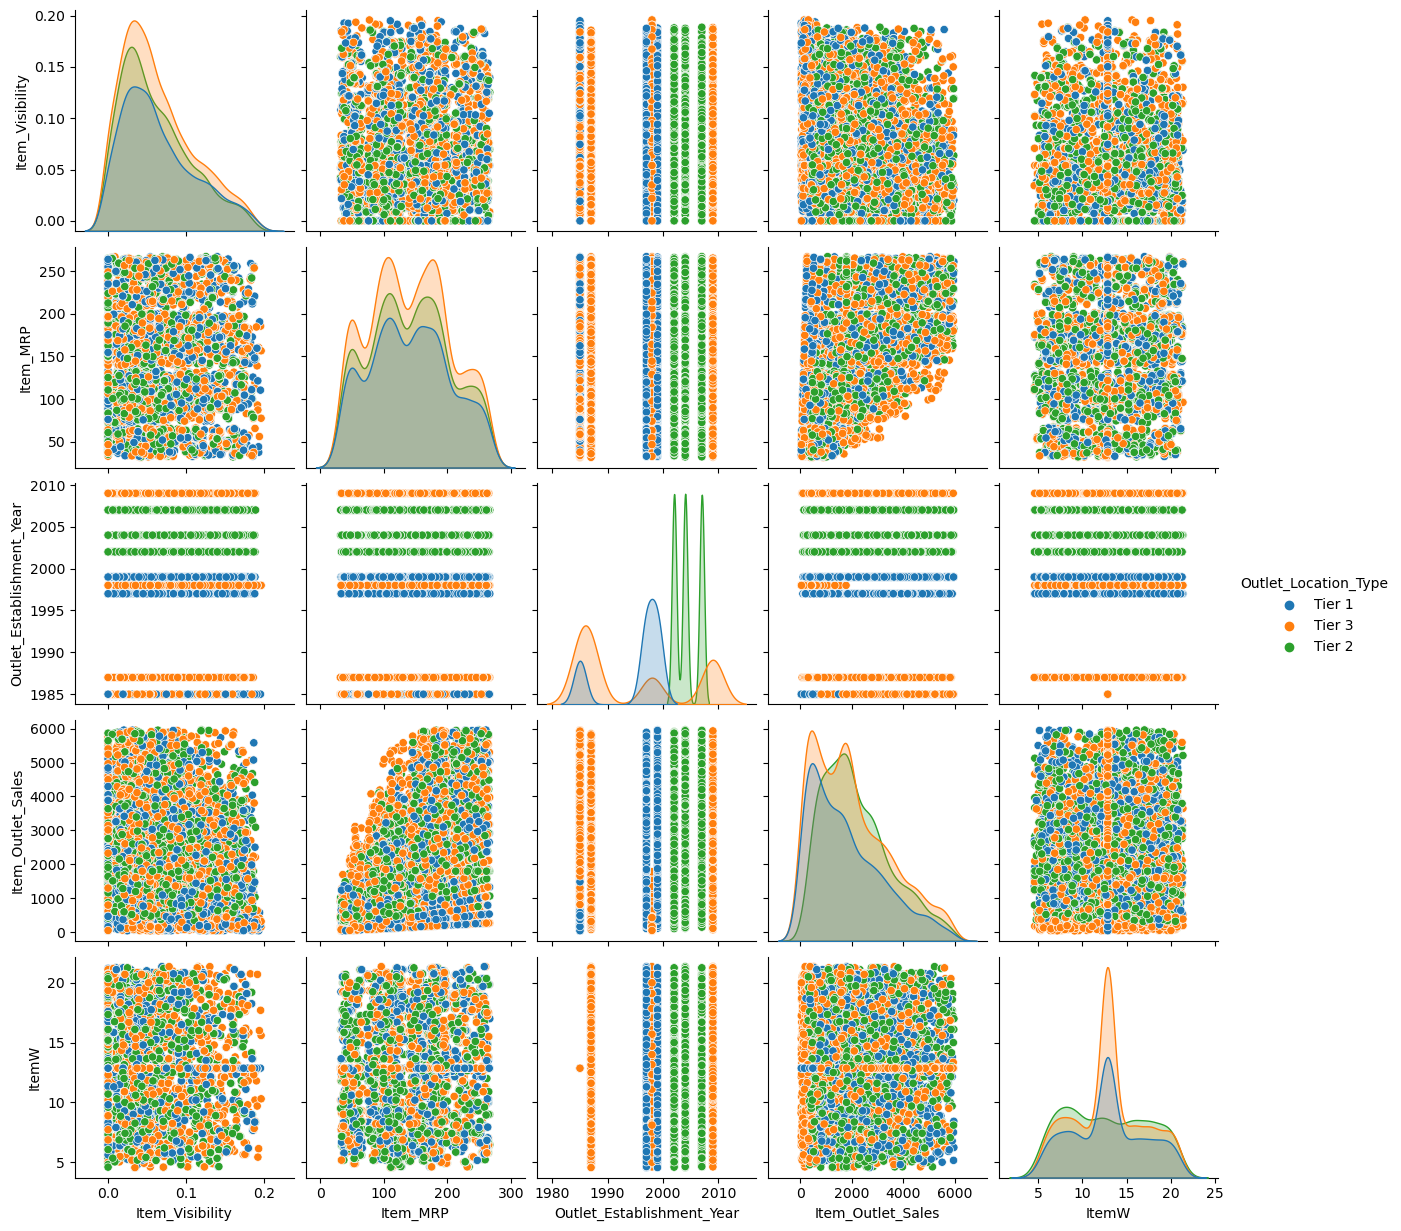

In [50]:
sns.pairplot(df_new,hue='Outlet_Location_Type')

### from the above jointplot matrix a relation between year of establishment and outlet sales can also be observed with respect to outlet location type

## FEATURE ENGINEERING
 ENCODING CATEGORICAL VARIABLES
 OUTLIER ENGINEERING

### ONE HOT ENCODING

In [35]:

categorical_columns = df_new.select_dtypes(include=['object', 'category'])
categorical_columns 
lis=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
print(len(lis))

5


In [36]:
# for training data

for i in range(0,5):
    one_hot_encoded = pd.get_dummies(df_new[lis[i]])
    print(one_hot_encoded)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_new, one_hot_encoded], axis=1)


df0=df_encoded.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)

# Display the resulting DataFrame
print(df0)



      LF  Low Fat  Regular  low fat  reg
0      0        1        0        0    0
1      0        0        1        0    0
2      0        1        0        0    0
3      0        0        1        0    0
4      0        1        0        0    0
...   ..      ...      ...      ...  ...
8518   0        1        0        0    0
8519   0        0        1        0    0
8520   0        1        0        0    0
8521   0        0        1        0    0
8522   0        1        0        0    0

[8523 rows x 5 columns]
      Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
0                0       0          0       0      1             0   
1                0       0          0       0      0             0   
2                0       0          0       0      0             0   
3                0       0          0       0      0             0   
4                0       0          0       0      0             0   
...            ...     ...        ...     ...    ...           

In [42]:
# for test data

for i in range(0,5):
    one_hot_encoded1 = pd.get_dummies(df_new1[lis[i]])
    print(one_hot_encoded1)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded2 = pd.concat([df_new1, one_hot_encoded1], axis=1)


df9=df_encoded2.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1)

# Display the resulting DataFrame
print(df9)


      LF  Low Fat  Regular  low fat  reg
0      0        1        0        0    0
1      0        0        0        0    1
2      0        1        0        0    0
3      0        1        0        0    0
4      0        0        1        0    0
...   ..      ...      ...      ...  ...
5676   0        0        1        0    0
5677   0        0        1        0    0
5678   0        1        0        0    0
5679   0        0        1        0    0
5680   0        0        1        0    0

[5681 rows x 5 columns]
      Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
0                0       0          0       0      0             0   
1                0       0          0       0      1             0   
2                0       0          0       0      0             0   
3                0       0          0       0      0             0   
4                0       0          0       0      1             0   
...            ...     ...        ...     ...    ...           

 ### LABEL ENCODING 

In [58]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

for i in range(0,5):
     df_new[lis[i]] = label_encoder.fit_transform(df_new[lis[i]])

# Display the resulting DataFrame
print(df_new)


# label encoding is generally suited for the cases where the categorical variable has some ordinal relationship which is not
# case here hence one-hot-encoding suits better here


      Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0                    1         0.016047          4  249.8092   
1                    2         0.019278         14   48.2692   
2                    1         0.016760         10  141.6180   
3                    2         0.000000          6  182.0950   
4                    1         0.000000          9   53.8614   
...                ...              ...        ...       ...   
8518                 1         0.056783         13  214.5218   
8519                 2         0.046982          0  108.1570   
8520                 1         0.035186          8   85.1224   
8521                 2         0.145221         13  103.1332   
8522                 1         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                    

# MODELING


## LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  'df0' is training DataFrame and 'df9' is  testing DataFrame

# Splitting the training data into features (X_train) and target variable (y_train)
X_train = df0.drop('Item_Outlet_Sales', axis=1)  # Remove the target variable column
y_train = df0['Item_Outlet_Sales']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate the coefficient of determination (R^2 score) on the training set
train_r2 = r2_score(y_train, y_train_pred)

# Print the training results
print("Training Mean Squared Error:", train_mse)
print("Training Coefficient of Determination (R^2):", train_r2)

# Predict using the trained model on the testing set (dfaa)
X_test = df9  # Features for testing
y_test_pred = model.predict(X_test)  # Make predictions on the testing set

# Print the predicted values for the testing set
print("Predicted values for the testing set:", y_test_pred)


Training Mean Squared Error: 1010848.2331775189
Training Coefficient of Determination (R^2): 0.49236820117139013
Predicted values for the testing set: [1807.03038295 1571.29492907 1536.41317384 ... 1925.60620591 3065.7111921
 1467.93285291]


## REGULARIZED LINEAR REGRESSION- LASSO REGRESSION AND RIDGE REGRESSION

In [44]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# Split the training data into features (X_train) and target variable (y_train)
X_train = df0.drop('Item_Outlet_Sales', axis=1)  # Remove the target variable column
y_train = df0['Item_Outlet_Sales']

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.6)  # Set the regularization parameter alpha

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the training set using the Ridge model
y_pred_ridge_train = ridge_model.predict(X_train)

# Calculate the mean squared error for Ridge regression on the training data
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)

# Calculate the coefficient of determination (R-squared) for Ridge regression on the training data
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Set the regularization parameter alpha

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training set using the Lasso model
y_pred_lasso_train = lasso_model.predict(X_train)

# Calculate the mean squared error for Lasso regression on the training data
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)

# Calculate the coefficient of determination (R-squared) for Lasso regression on the training data
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Print the results for Ridge regression on the training data
print("Ridge Regression (Training Data):")
print("Mean Squared Error:", mse_ridge_train)
print("Coefficient of Determination (R-squared):", r2_ridge_train)

# Print the results for Lasso regression on the training data
print("\nLasso Regression (Training Data):")
print("Mean Squared Error:", mse_lasso_train)
print("Coefficient of Determination (R-squared):", r2_lasso_train)


Ridge Regression (Training Data):
Mean Squared Error: 1010848.3791179281
Coefficient of Determination (R-squared): 0.4923681278824531

Lasso Regression (Training Data):
Mean Squared Error: 1010853.2793256851
Coefficient of Determination (R-squared): 0.4923656670765708


## RANDOM FOREST REGRESSION

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train = df0.drop('Item_Outlet_Sales', axis=1)  
y_train = df0['Item_Outlet_Sales']

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=50)

rf_regressor.fit(X_train, y_train)

#making predictions on the training data set
y_train_pred = rf_regressor.predict(X_train)

# Making predictions on the test set
X_test = df9
y_test_pred_rf = rf_regressor.predict(X_test)

print("Predicted values for the testing set:", y_test_pred_rf)

# Calculate the mean squared error for Random Forest regression on the training data
mse = mean_squared_error(y_train, y_train_pred)

# Calculate the coefficient of determination (R-squared) for Random Forest regression on the training data
r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination (R-squared):", r2)


Predicted values for the testing set: [1507.044958 1257.356642  644.041656 ... 1633.993044 3166.225216
 1616.19621 ]
Mean Squared Error: 148618.35097300305
Coefficient of Determination (R-squared): 0.9253662435495217


### hence an R sq value of 92.5% is reached

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X_train = df0.drop('Item_Outlet_Sales', axis=1)  
y_train = df0['Item_Outlet_Sales']
X_test = df9

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Training the regressor
xgb_regressor.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred_xgb = xgb_regressor.predict(X_train)

# Making predictions on the test set
y_test_pred_xgb = xgb_regressor.predict(X_test)

# Calculate the mean squared error for XGBoost regression on the training data
mse_train = mean_squared_error(y_train, y_train_pred_xgb)

# Calculate the coefficient of determination (R-squared) for XGBoost regression on the training data
r2_train = r2_score(y_train, y_train_pred_xgb)

print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - Coefficient of Determination (R-squared):", r2_train)

print("Predicted values for the testing set:", y_test_pred_xgb)


Training Set - Mean Squared Error: 452759.892404119
Training Set - Coefficient of Determination (R-squared): 0.772631230806941
Predicted values for the testing set: [1388.3258 1398.8906  603.6784 ... 1872.8761 3249.8962 1200.4232]


### IT CAN BE OBSERVED THAT RANDOM FOREST REGRESSOR IS THE BEST MODEL TO USE HERE TO PREDICT SALES.